In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv('CAR DETAILS.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
data.shape

(4340, 8)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
data.duplicated().sum()

763

In [5]:
dupl = data[data.duplicated()]
dupl

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [9]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [43]:
data['brand'] = data.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
data['model'] = data.name.apply(lambda x : ' '.join(x.split(' ')[1:]))

In [44]:
data.drop('name' ,axis = 1, inplace = True)


In [8]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [13]:
data['brand'].value_counts()

brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [9]:
data['model'].value_counts()

model
Swift Dzire VDI                    69
Alto 800 LXI                       59
Alto LXi                           47
Alto LX                            35
EON Era Plus                       35
                                   ..
Verna Transform CRDi VGT SX ABS     1
S-Presso VXI Plus                   1
Etios Liva 1.2 VX                   1
Yaris G                             1
i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

## Data visualization

the most comman car model are used by people


Above the chart is showing that the most comman model is maruti.

In [45]:
def visualize(data,column):

  print('countplot visualization')
 
  plt.figure(figsize = (10,7))
  sns.countplot(data = data,  x = column, palette= 'CMRmap' )
  plt.xticks(rotation = 45)
  plt.xlabel(column, fontsize = 12, color = 'b')
  plt.ylabel('count',fontsize = 12, color = 'b')
  plt.title(f'distrubution {column} is Year by', color = 'blue', fontsize = 12)
  plt.legend()
  plt.show()
  print('\n')

  print('pie chart visualization')
  print('\n')
  labels = data[column].value_counts().index
  size = data[column].value_counts()
  
  plt.figure(figsize = (8,8))
  plt.pie(size, labels = labels , autopct = '%1.1f%%',shadow = True, startangle = 45, rotatelabels=False)
  plt.title(f'distrubution {column} is year by', fontsize = 10, color = 'g')
  plt.show()


  print('\n')
  print('histplot visualization')
  plt.figure(figsize = (8,4))
  sns.histplot(data = data[column], bins = 20, kde = True)
  plt.title(f'distrubution of {column}')
  plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


countplot visualization


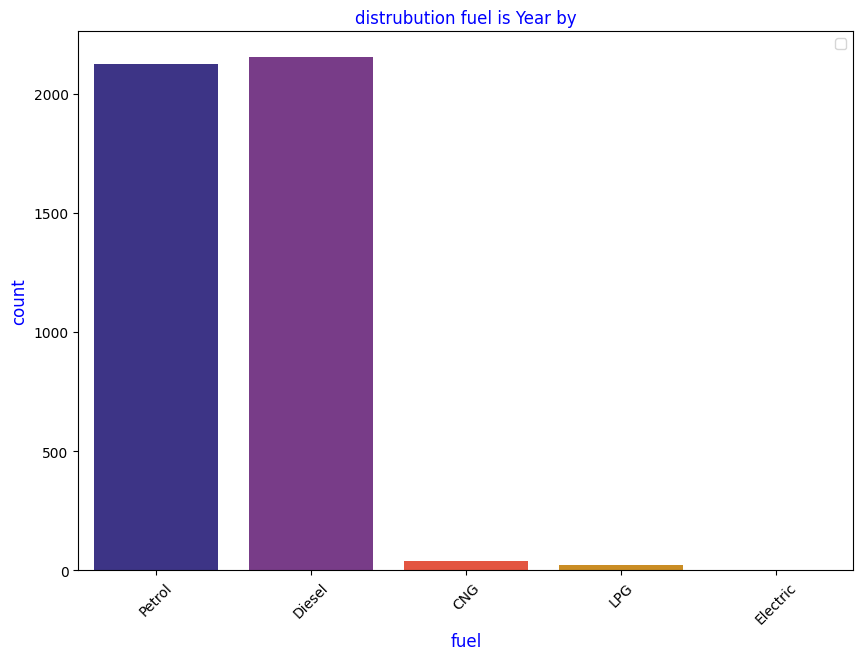



pie chart visualization




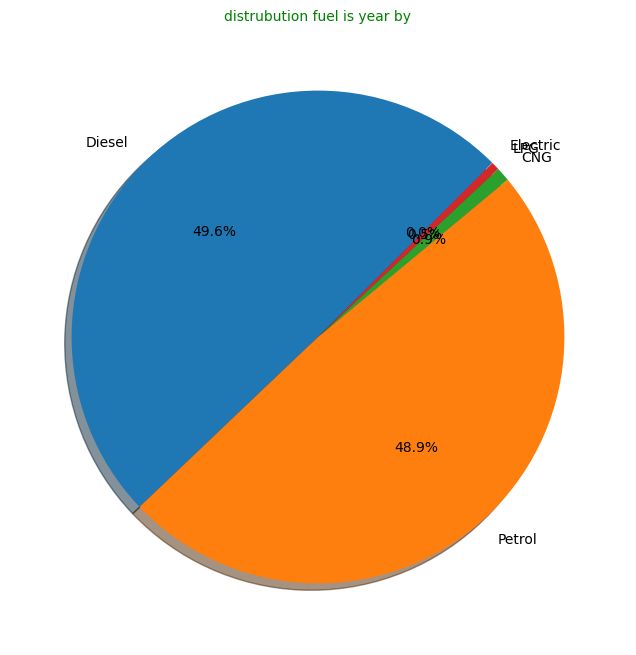



histplot visualization


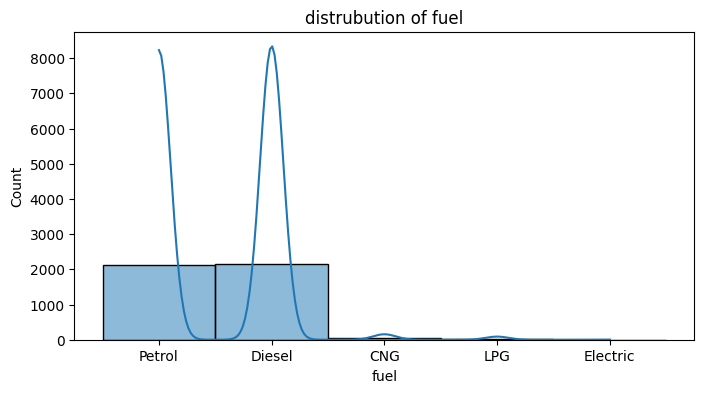

In [46]:

visualize(data,'fuel')

countplot visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


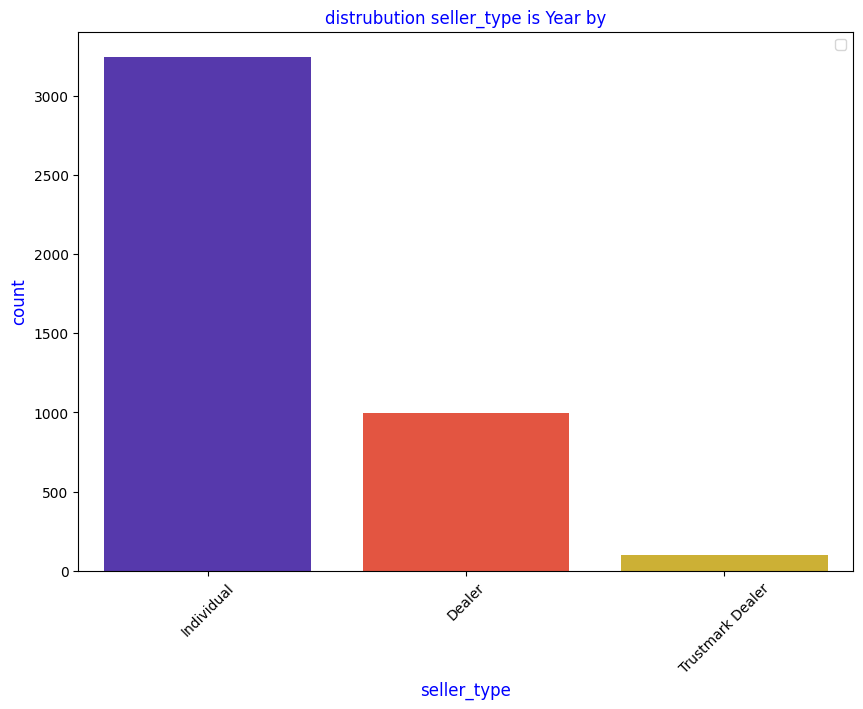



pie chart visualization




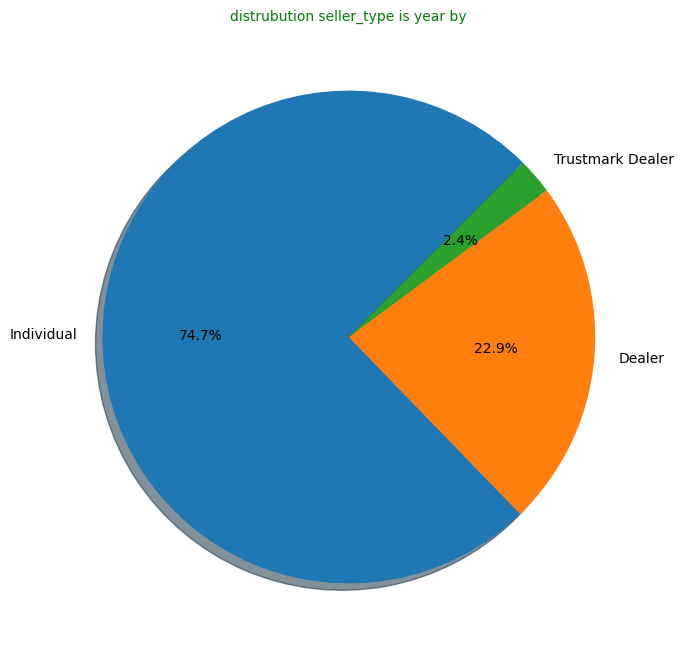



histplot visualization


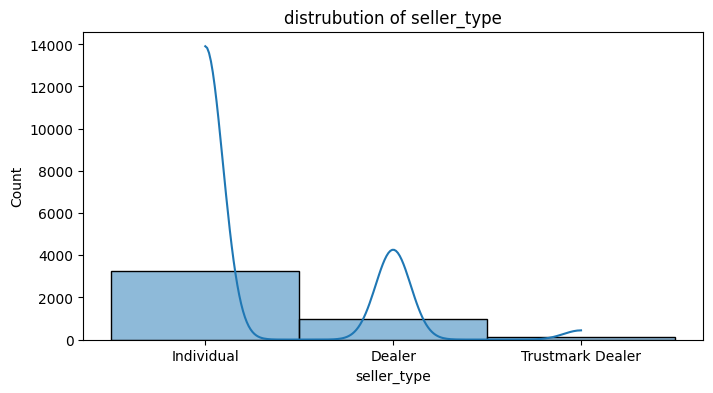

In [19]:
visualize(data,'seller_type')

countplot visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


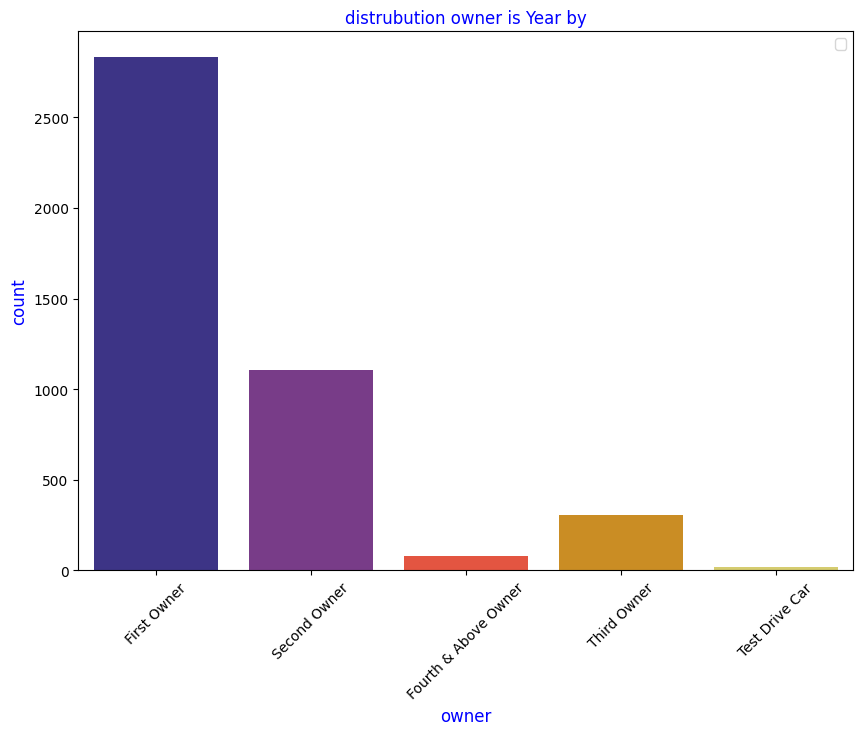



pie chart visualization




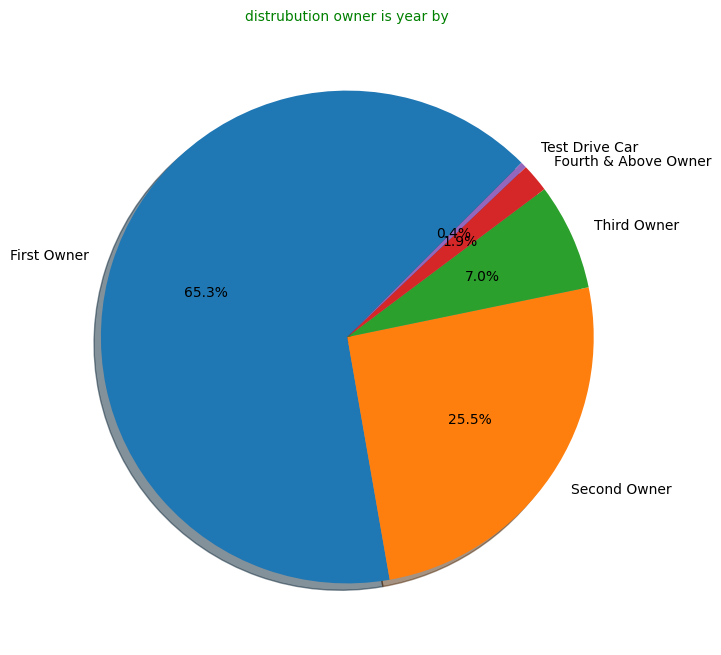



histplot visualization


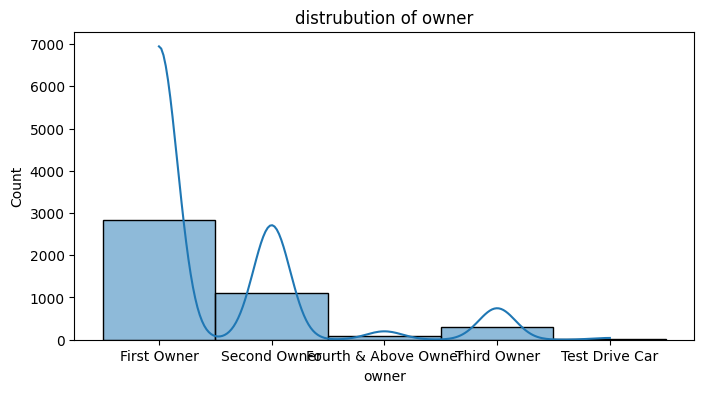

In [20]:
visualize(data,'owner')

countplot visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


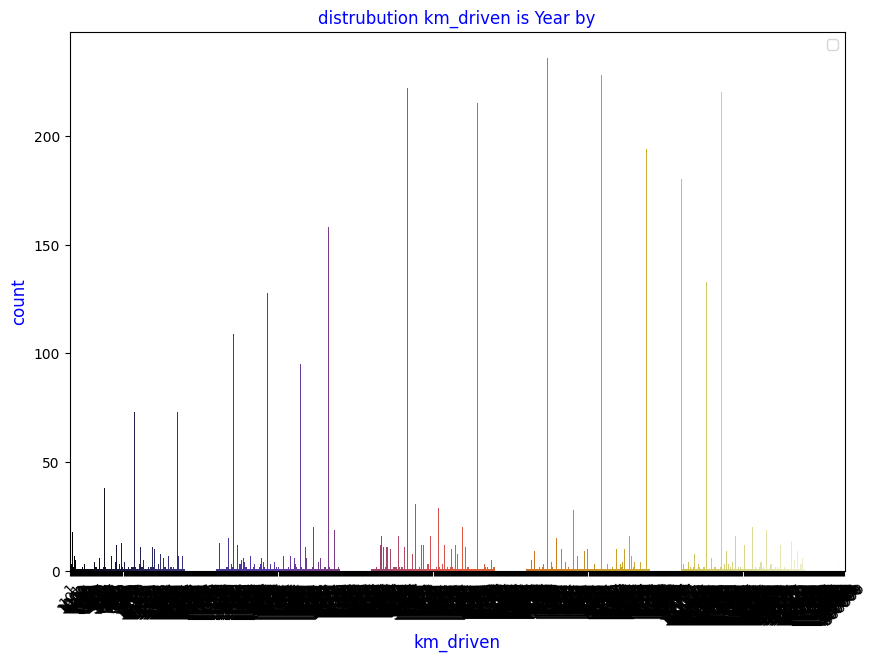



pie chart visualization




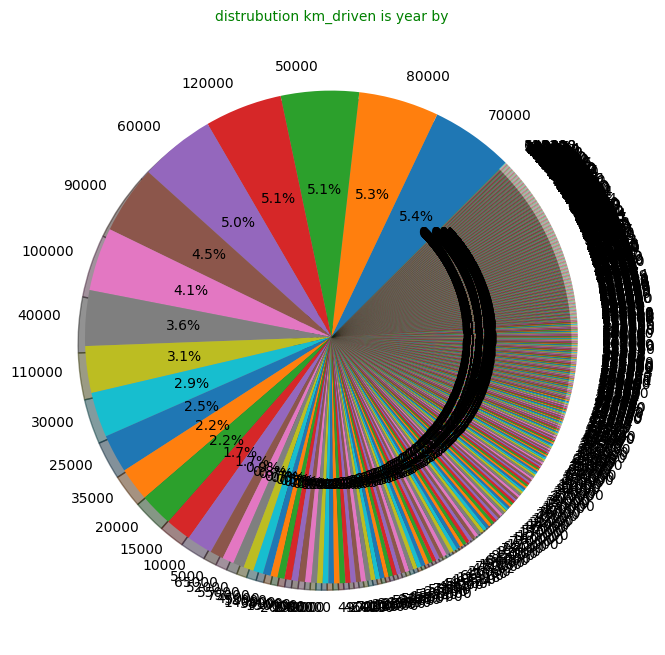



histplot visualization


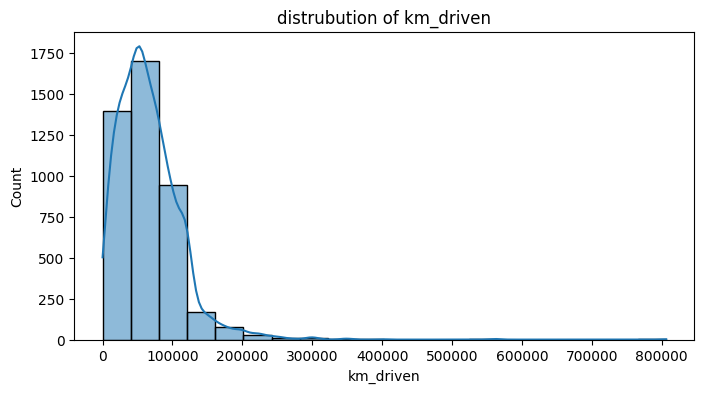

In [21]:
visualize(data,'km_driven')

countplot visualization




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


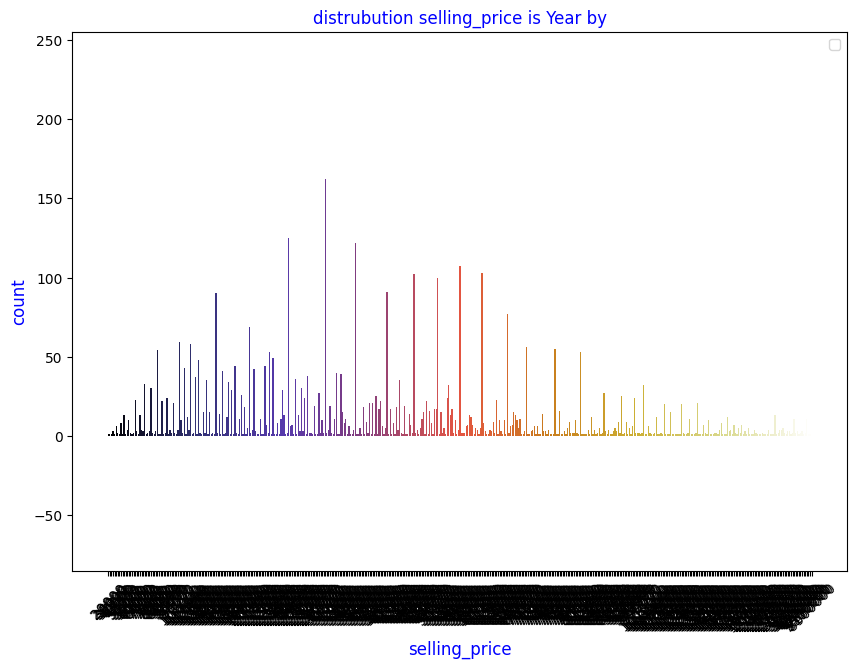



pie chart visualization




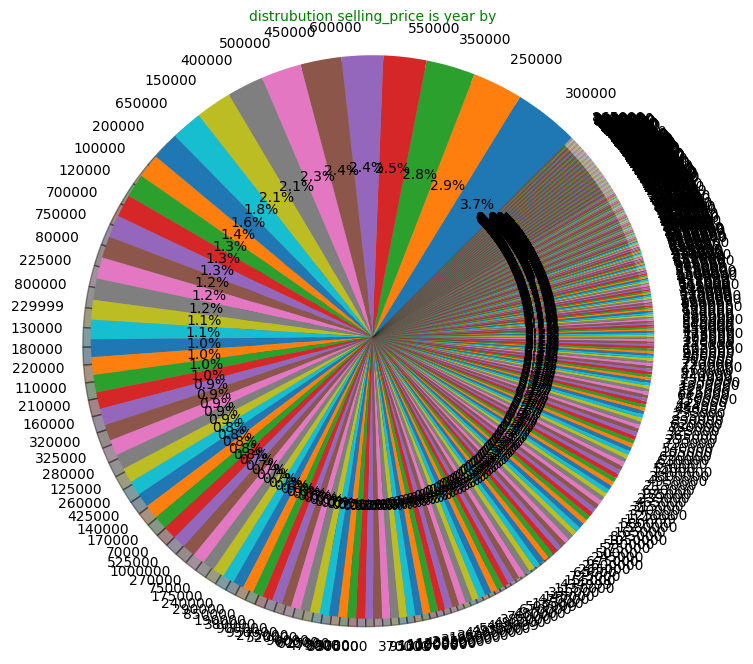



visualize using histplot




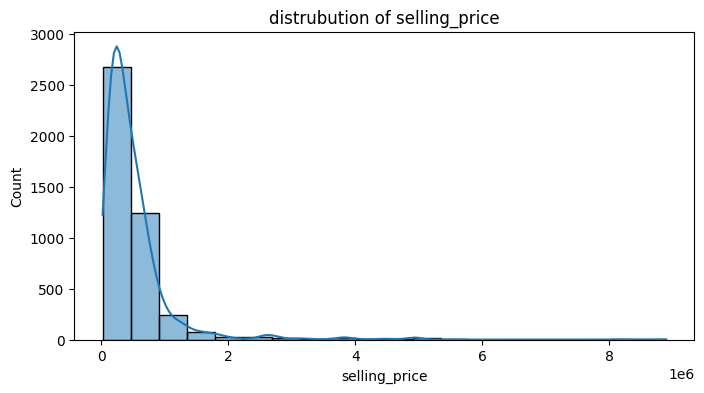

In [21]:
visualize(data,'selling_price')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


countplot visualization


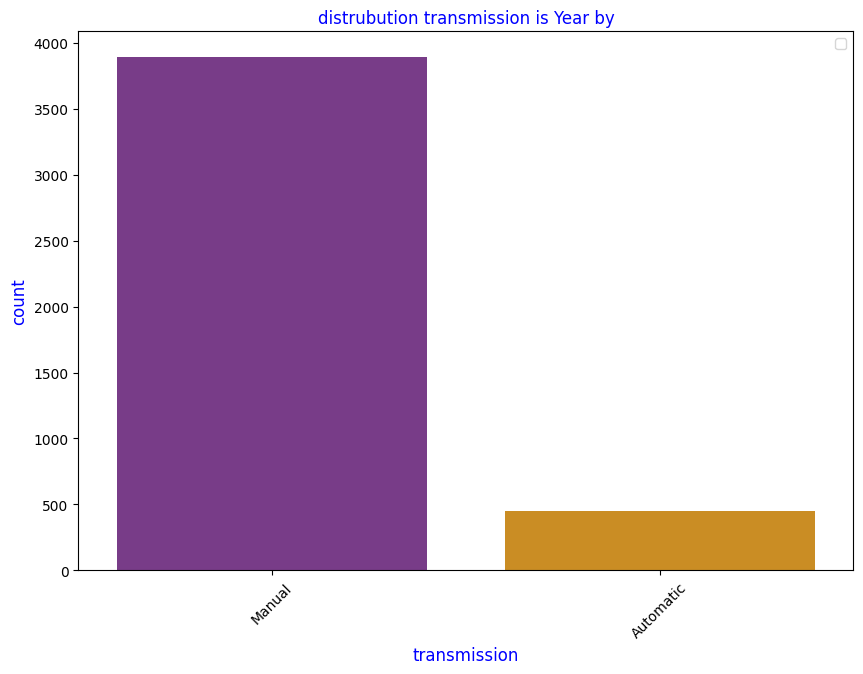



pie chart visualization




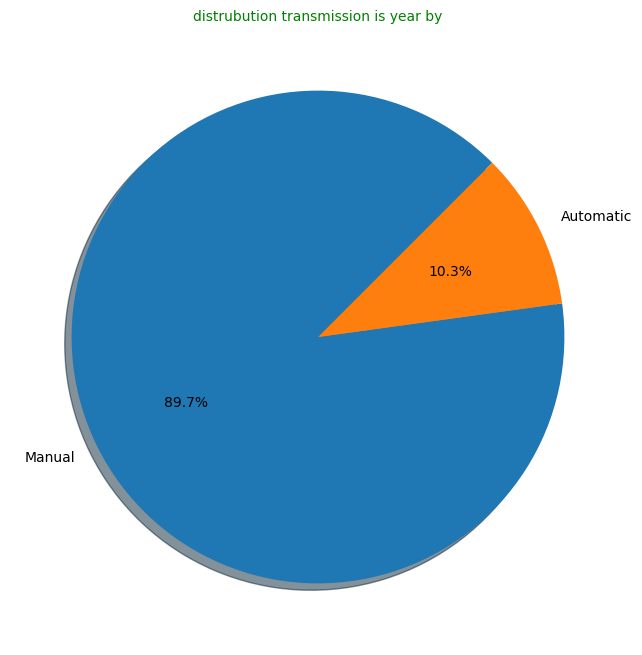



histplot visualization


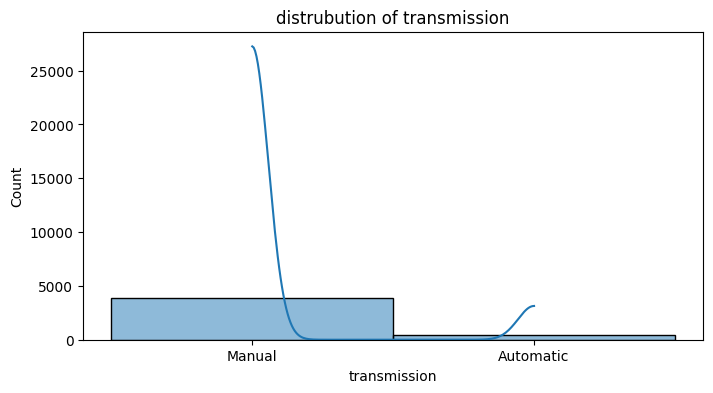

In [22]:
visualize(data,'transmission')

In [47]:
# making copy of orignal dataset

new_df = data.copy()

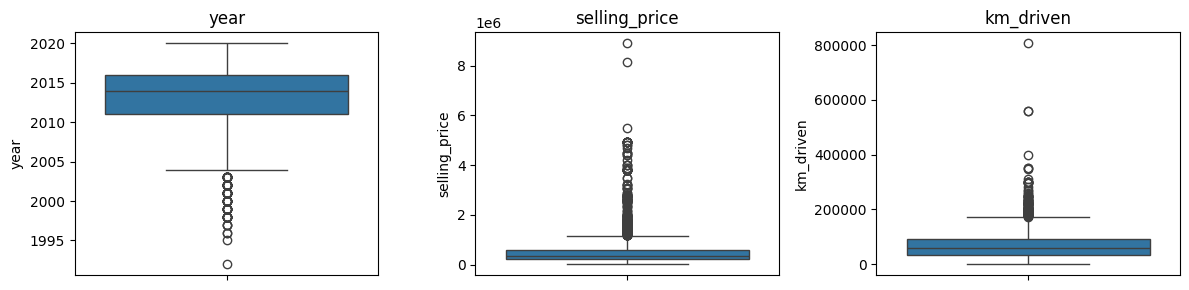

In [48]:
# outlier
columns = ['year','selling_price','km_driven']

fig, axes = plt.subplots(nrows=1, ncols=len(columns),figsize = (12,3) )

for i, column in enumerate(columns):
  sns.boxplot(data = new_df[column], ax = axes[i])
  axes[i].set_title(columns[i])

plt.tight_layout()
plt.show()

In [49]:
# remove outliers
def remove_outliers(data,columns):

  q1,q3 = data[columns].quantile([.25,.75])

  # find iqr
  iqr = q3 - q1

  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  # capping outliers
  outliers = data[(data[columns]> lower_bound) & (data[columns]<upper_bound)]

  return outliers

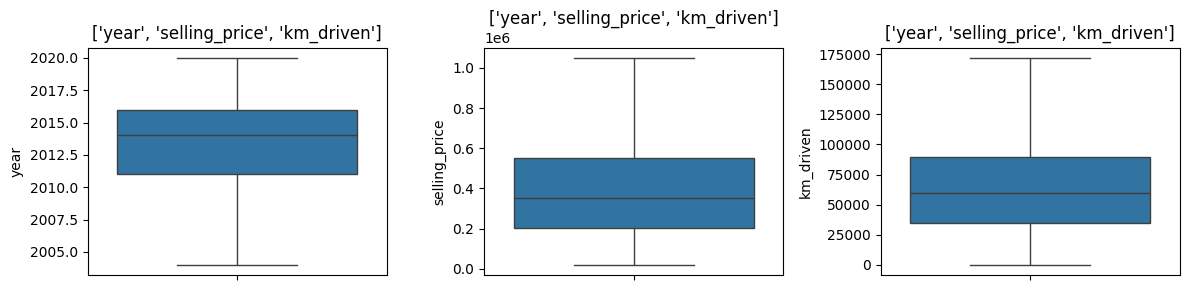

In [51]:
# remove outliers
for column in columns:
  new_df = remove_outliers(new_df, column)

# checking outliers after remove outliers
fig, axes = plt.subplots(nrows=1, ncols=len(columns),figsize = (12,3) )
for i, column in enumerate(columns):
  sns.boxplot(data = new_df[column], ax = axes[i])
  axes[i].set_title(columns)

plt.tight_layout()
plt.show()

### now the dataset is free from outliers now i can do next step
## Data Preprocessing
##### Handling categorical columns

In [52]:
new_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [122]:
new_df.to_csv('cleaned_car_data',  index = False)

In [53]:
# first  make a copy of the dataset
df = new_df.copy()

categorical_column = ['fuel','seller_type','transmission','owner','brand','model']

In [29]:
import pickle
# prompt: create  list of all brand names

brand_names = data['brand'].unique()
model_names = data['model'].unique()

pickle.dump(brand_names,open('brand_name.pkl','wb'))
pickle.dump(model_names,open('model_name.pkl','wb'))


In [54]:
# encoding categorical columns
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for column in categorical_column:
  df[column] =  lb.fit_transform(df[column])



In [55]:
df.dtypes

year             int64
selling_price    int64
km_driven        int64
fuel             int32
seller_type      int32
transmission     int32
owner            int32
brand            int32
model            int32
dtype: object

In [56]:
df.to_csv('cars_modify.csv', index = False)

In [57]:
df1 = pd.read_csv('cars_modify.csv')
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,4,1,1,0,11,4
1,2007,135000,50000,4,1,1,0,11,1153
2,2012,600000,100000,1,1,1,0,9,1095
3,2017,250000,46000,4,1,1,0,4,808
4,2014,450000,141000,1,1,1,2,8,80


Train the model


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from sklearn.svm import SVR

def compare_models(x_train, y_train, x_test, y_test, models):
    results = []

    for model_name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        results.append((model_name, mae, mse, rmse, r2))

    result_df = pd.DataFrame(
            results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R-squared']
    )
    result_df = result_df.sort_values(by="R-squared", ascending=False)
    return result_df

def evaluate_model(data):
    x = data.drop('selling_price', axis=1)
    y = data['selling_price']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    models = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest Regressor", RandomForestRegressor()),
        ("Support Vector Regressor", SVR()),
        ("Bagging Regressor", BaggingRegressor()),
        ("Voting Regressor", VotingRegressor([('lr', LinearRegression()), ('rf', RandomForestRegressor()), ('svr', SVR())]))
    ]

    results_df = compare_models(x_train, y_train, x_test, y_test, models)
    best_model_name = results_df.iloc[0]['Model']  # Get the name of the best model
    best_model = dict(models)[best_model_name]
    print(results_df)

    return best_model




In [64]:
df = pd.read_csv('cars_modify.csv')

In [105]:

best_model = evaluate_model(df)
best_model

                      Model            MAE           MSE           RMSE  \
1   Random Forest Regressor   66400.105079  9.825195e+09   99122.123610   
3         Bagging Regressor   69737.739918  1.079969e+10  103921.579614   
4          Voting Regressor  110541.600077  2.060682e+10  143550.761539   
0         Linear Regression  125731.435514  2.636876e+10  162384.612004   
2  Support Vector Regressor  190787.836886  5.661059e+10  237929.806698   

   R-squared  
1   0.820336  
3   0.802516  
4   0.623182  
0   0.517819  
2  -0.035186  


RandomForestRegressor()

In [106]:
import pickle
# Save the model
# Save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [123]:
# Load necessary libraries
import pandas as pd
import pickle
import random

# Load the car details dataset
cars_modify = pd.read_csv('cars_modify.csv')

# Pick 20 random data points
random_data = random.sample(list(cars_modify.index), 200)

# Load the saved model
loaded_model = pickle.load(open('best_model.pkl', 'rb'))

# Remove the target variable 'selling_price' if present
new_data = cars_modify.drop('selling_price', axis=1, errors='ignore')

# Extract actual selling prices
actual_selling_prices = cars_modify.loc[random_data, 'selling_price']

# Apply the model to the random data
predictions = loaded_model.predict(new_data.loc[random_data])

# Calculate the percentage difference
percentage_difference = ((predictions - actual_selling_prices) / actual_selling_prices) * 100

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Actual Selling Price': actual_selling_prices,
    'Predicted Selling Price': predictions,
    'Percentage Difference': percentage_difference
})

# Print the results
print(results_df)


      Actual Selling Price  Predicted Selling Price  Percentage Difference
2224                550000                482959.99             -12.189093
1038                 75000                 72190.00              -3.746667
3396                795000                660310.00             -16.942138
1275                320000                289009.97              -9.684384
2479                300000                350750.00              16.916667
...                    ...                      ...                    ...
128                 400000                438059.99               9.514997
2104                610000                572760.00              -6.104918
1180                165000                174920.00               6.012121
1277                380000                380099.99               0.026313
1745                349000                412809.99              18.283665

[200 rows x 3 columns]
